## Final Project: Terrorism in the US

**Dataset:** Global Terrorism Database <br>
**Source:** University of Maryland, "45 Years of Terrorism: Terrorist violence that occurred worldwide between 1970 and 2015." <br>
Retrieved from: https://www.start.umd.edu/gtd/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\sbortnem\\Desktop\\Summer 2019\\APAN 5210 - Python\\Final Project\\gtd\\globalterrorism.csv", encoding='ISO-8859-1',
                 usecols = [0,1,2,3,7,8,11,12,13,14,18,26,27,28,29,30,31,34,35,36,37,40,41,58,81,82,83,84,97,98,101],
                low_memory = False)

df = df.rename(
    columns={'eventid':'id', 'iyear':'year', 'imonth':'month', 'iday':'day', 'country':'country_code',
             'country_txt':'country', 'provstate':'state', 'attacktype1':'attack_type_code',
             'attacktype1_txt':'attack_type', 'attacktype2':'attack_type2_code', 'attacktype2_txt':'attack_type2',
             'targtype1':'target_type_code', 'targtype1_txt':'target',
             'targsubtype1' : 'target_subtype_code', 'targsubtype1_txt' : 'target_subtype',
             'natlty1':'nationality_code', 'natlty1_txt':'nationality', 'gname':'group_name',
             'weaptype1':'weapon_code','weaptype1_txt':'weapon', 'weapsubtype1':'weapon_subtype_code',
             'weapsubtype1_txt':'weapon_subtype', 'weapdetail':'weapon_detail',
             'nkill':'fatalities','nwound':'wounded', })

In [3]:
df.shape

(181691, 31)

In [4]:
df.head()

,id,year,month,day,country_code,country,state,city,latitude,longitude,...,nationality_code,nationality,group_name,weapon_code,weapon,weapon_subtype_code,weapon_subtype,weapon_detail,fatalities,wounded
0,1.970000e+11,1970,7,2,58,Dominican Republic,NaN,Santo Domingo,18.456792,-69.951164,...,58.0,Dominican Republic,MANO-D,13,Unknown,NaN,NaN,NaN,1.0,0.0
1,1.970000e+11,1970,0,0,130,Mexico,Federal,Mexico city,19.371887,-99.086624,...,21.0,Belgium,23rd of September Communist League,13,Unknown,NaN,NaN,NaN,0.0,0.0
2,1.970010e+11,1970,1,0,160,Philippines,Tarlac,Unknown,15.478598,120.599741,...,217.0,United States,Unknown,13,Unknown,NaN,NaN,NaN,1.0,0.0
3,1.970010e+11,1970,1,0,78,Greece,Attica,Athens,37.997490,23.762728,...,217.0,United States,Unknown,6,Explosives,16.0,Unknown Explosive Type,Explosive,NaN,NaN
4,1.970010e+11,1970,1,0,101,Japan,Fukouka,Fukouka,33.580412,130.396361,...,217.0,United States,Unknown,8,Incendiary,NaN,NaN,Incendiary,NaN,NaN


In [5]:
df.columns

Index(['id', 'year', 'month', 'day', 'country_code', 'country', 'state',
       'city', 'latitude', 'longitude', 'summary', 'success', 'suicide',
       'attack_type_code', 'attack_type', 'attack_type2_code', 'attack_type2',
       'target_type_code', 'target', 'target_subtype_code', 'target_subtype',
       'nationality_code', 'nationality', 'group_name', 'weapon_code',
       'weapon', 'weapon_subtype_code', 'weapon_subtype', 'weapon_detail',
       'fatalities', 'wounded'],
      dtype='object')

In [6]:
df.dtypes

id                     float64
year                     int64
month                    int64
day                      int64
country_code             int64
country                 object
state                   object
city                    object
latitude               float64
longitude              float64
summary                 object
success                  int64
suicide                  int64
attack_type_code         int64
attack_type             object
attack_type2_code      float64
attack_type2            object
target_type_code         int64
target                  object
target_subtype_code    float64
target_subtype          object
nationality_code       float64
nationality             object
group_name              object
weapon_code              int64
weapon                  object
weapon_subtype_code    float64
weapon_subtype          object
weapon_detail           object
fatalities             float64
wounded                float64
dtype: object

In [6]:
df.describe()

,id,year,month,day,country_code,latitude,longitude,success,suicide,attack_type_code,attack_type2_code,target_type_code,target_subtype_code,nationality_code,weapon_code,weapon_subtype_code,fatalities,wounded
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,6314.000000,181691.000000,171318.000000,180132.000000,181691.000000,160923.000000,171378.000000,165380.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,131.968501,23.498343,-4.586957e+02,0.889598,0.036507,3.247547,3.719512,8.439719,46.971474,127.686441,6.447325,11.117162,2.403272,3.167668
std,1.325957e+09,13.259430,3.388303,8.814045,112.414535,18.569242,2.047790e+05,0.313391,0.187549,1.915772,2.272023,6.653838,30.953357,89.299120,2.173435,6.495612,11.545741,35.949392
min,1.970000e+11,1970.000000,0.000000,0.000000,4.000000,-53.154613,-8.618590e+07,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,78.000000,11.510046,4.545640e+00,1.000000,0.000000,2.000000,2.000000,3.000000,22.000000,83.000000,5.000000,5.000000,0.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,98.000000,31.467463,4.324651e+01,1.000000,0.000000,3.000000,2.000000,4.000000,35.000000,101.000000,6.000000,12.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,160.000000,34.685087,6.871033e+01,1.000000,0.000000,3.000000,7.000000,14.000000,74.000000,173.000000,6.000000,16.000000,2.000000,2.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1004.000000,74.633553,1.793667e+02,1.000000,1.000000,9.000000,9.000000,22.000000,113.000000,1004.000000,13.000000,31.000000,1570.000000,8191.000000


In [7]:
## Subsetting only US data
df = df[df.country == 'United States']
df.country = df.country.astype('category')
country_list = df.country.cat.categories.tolist()
len(country_list)

1

In [8]:
## Checking for NAs
nnull = df.isnull()
nnull.sum()

id                        0
year                      0
month                     0
day                       0
country_code              0
country                   0
state                     4
city                      0
latitude                  1
longitude                 1
summary                1053
success                   0
suicide                   0
attack_type_code          0
attack_type               0
attack_type2_code      2785
attack_type2           2785
target_type_code          0
target                    0
target_subtype_code     120
target_subtype          120
nationality_code          9
nationality               9
group_name                0
weapon_code               0
weapon                    0
weapon_subtype_code     259
weapon_subtype          259
weapon_detail           544
fatalities               73
wounded                  93
dtype: int64

In [9]:
## Imputing NAs
#States
df[df.state.isnull()]
df.loc[df['id'] == 199512080005,'state'] = 'New York'
df.loc[df['id'] == 197209280011,'state'] = 'District of Columbia'
df.loc[df['id'] == 201701070015,'state'] = 'Texas'
df.loc[df['id'] == 201702060025,'state'] = 'New Hampshire'

#Longitude, latitude (among other missing values) - 1 affected row
df[df.longitude.isnull()]
df = df.loc[df['id'] != 197601010002] #removing the affected row due to limited data

#Summary
df.summary = df.summary.fillna('No Summary').astype(object)

#Attack type 2 - based on unknown values in existing records
df.attack_type2_code = df.attack_type2_code.fillna(9).astype(int)
df.attack_type2 = df.attack_type2.fillna('Unknown').astype(object)

#Target subtype - based on unknown values in existing records
df.target_subtype_code = df.target_subtype_code.fillna(20).astype(int)
df.target_subtype = df.target_subtype.fillna('Unknown').astype(object)

#Weapon subtype and detail - based on unknown values in existing records
df.weapon_subtype_code = df.weapon_subtype_code.fillna(13).astype(int)
df.weapon_subtype = df.weapon_subtype.fillna('Unknown').astype(object)
df.weapon_detail = df.weapon_detail.fillna('Unknown').astype(object)

#Nationality - creating an "Unknown" value
df.nationality_code = df.nationality_code.fillna(0).astype(int)
df.nationality = df.nationality.fillna('Unknown').astype(object)

#Fatalities
df.fatalities = df.fatalities.fillna(0).astype(int)

#Wounded
df.wounded = df.wounded.fillna(0).astype(int)

In [10]:
## Checking for NAs
nnull = df.isnull()
nnull.sum()

id                     0
year                   0
month                  0
day                    0
country_code           0
country                0
state                  0
city                   0
latitude               0
longitude              0
summary                0
success                0
suicide                0
attack_type_code       0
attack_type            0
attack_type2_code      0
attack_type2           0
target_type_code       0
target                 0
target_subtype_code    0
target_subtype         0
nationality_code       0
nationality            0
group_name             0
weapon_code            0
weapon                 0
weapon_subtype_code    0
weapon_subtype         0
weapon_detail          0
fatalities             0
wounded                0
dtype: int64

**Cleaning Data**

In [11]:
#adjusting data types
for col in ['country','state','city','success','suicide','attack_type','attack_type2','target','target_subtype','nationality','group_name','weapon','weapon_subtype','weapon_detail']:
    df[col] = df[col].astype('category')
    
for col in ['attack_type2_code','target_subtype_code', 'nationality_code', 'weapon_subtype_code']:
    df[col] = df[col].astype('int')

In [12]:
df.dtypes

id                        int64
year                      int64
month                     int64
day                       int64
country_code              int64
country                category
state                  category
city                   category
latitude                float64
longitude               float64
summary                  object
success                category
suicide                category
attack_type_code          int64
attack_type            category
attack_type2_code         int64
attack_type2           category
target_type_code          int64
target                 category
target_subtype_code       int64
target_subtype         category
nationality_code          int64
nationality            category
group_name             category
weapon_code               int64
weapon                 category
weapon_subtype_code       int64
weapon_subtype         category
weapon_detail          category
fatalities                int64
wounded                   int64
dtype: o

In [13]:
## Replacing ambigious values in the day column
df.loc[df['day'] == 0,'day'] = 1

In [14]:
## Combining date columns into one
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])
df.drop(['day','month'], axis=1, inplace=True)  

In [15]:
## Checking for duplicates
df = df.sort_values(['fatalities', 'wounded'], ascending = False)

## Removing duplicates
df = df.drop_duplicates(['latitude', 'longitude', 'fatalities', 'date'])

In [16]:
df.shape

(2490, 30)

## Exploratore Data Analysis

**Number of attacks over time**

In [17]:
grouped_year_id = pd.DataFrame(df,columns = ['year','id'])
grouped_year_id = grouped_year_id.groupby(['year']).count()
grouped_year_id = grouped_year_id.rename(columns = {'id':'number_of_attacks'})
grouped_year_id

,number_of_attacks
year,
1970,400
1971,213
1972,53
1973,54
1974,78
1975,118
1976,73
1977,106
1978,70


Text(0.5,0,'Year')

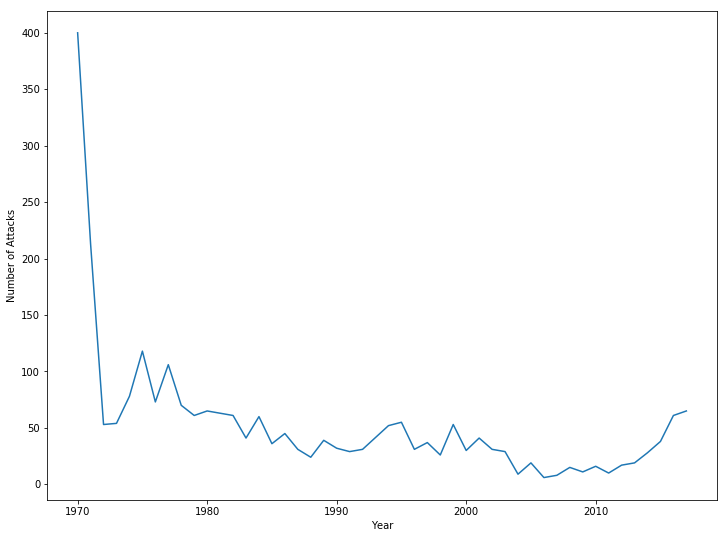

In [18]:
plt.figure(figsize=(12, 9))
plt.plot(grouped_year_id)
plt.ylabel('Number of Attacks')
plt.xlabel('Year')

**Number of total victims**

In [19]:
grouped_year_victims = pd.DataFrame(df,columns = ['year','fatalities','wounded'])
grouped_year_victims['victims'] = df.fatalities + df.wounded
grouped_year_victims = grouped_year_victims.groupby(['year']).sum()
grouped_year_victims

,fatalities,wounded,victims
year,,,
1970,33,152,185
1971,20,55,75
1972,9,29,38
1973,44,33,77
1974,13,54,67
1975,24,158,182
1976,3,37,40
1977,4,16,20
1978,8,8,16


Text(0.5,0,'Year')

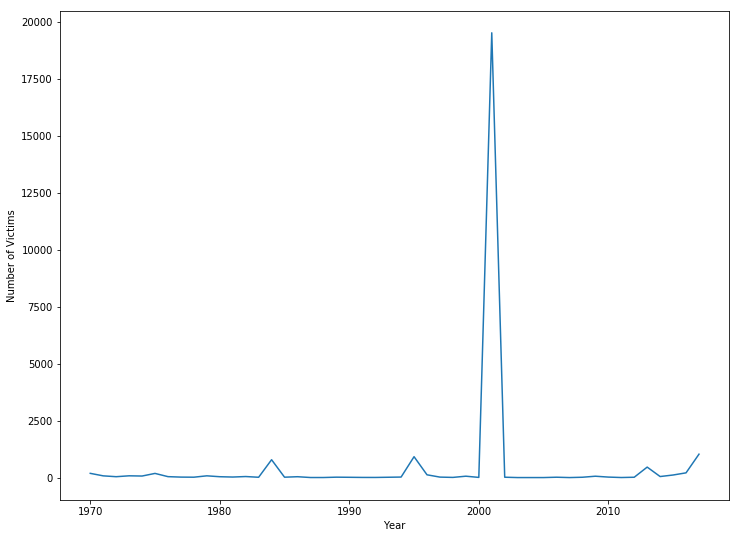

In [20]:
plt.figure(figsize=(12, 9))
plt.plot(grouped_year_victims.victims)
plt.ylabel('Number of Victims')
plt.xlabel('Year')

**Number of fatalities and number of wounded over time**

In [21]:
df_victims = pd.DataFrame(grouped_year_victims, columns = ['fatalities','wounded','victims'])

In [22]:
df_victims = df_victims.reset_index()
df_victims['year'] = (list(range(1970,1993)) + list(range(1994,2018)))

In [23]:
df_victims

,year,fatalities,wounded,victims
0,1970,33,152,185
1,1971,20,55,75
2,1972,9,29,38
3,1973,44,33,77
4,1974,13,54,67
5,1975,24,158,182
6,1976,3,37,40
7,1977,4,16,20
8,1978,8,8,16
9,1979,18,58,76


In [24]:
year = df_victims.year
all_victims = df_victims.victims
fatalities = df_victims.fatalities
wounded = df_victims.wounded

Text(0.5,0,'Year')

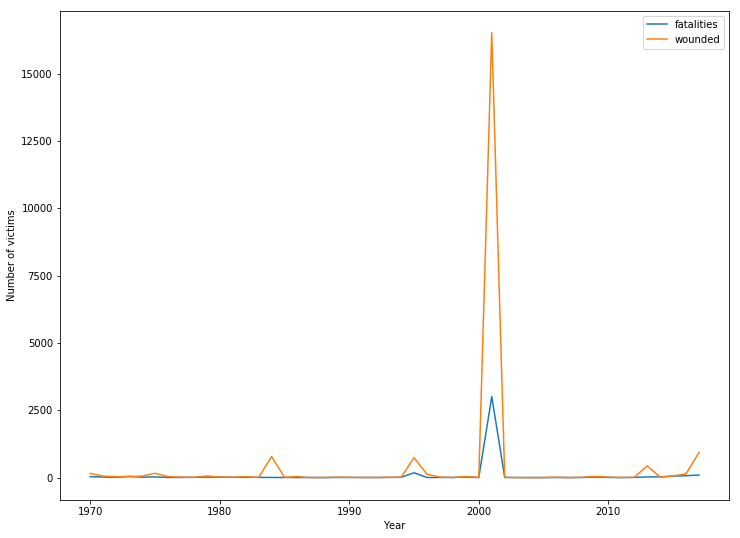

In [25]:
plt.figure(figsize=(12, 9))
plt.plot(year, fatalities)
plt.plot(year, wounded)
plt.legend()
plt.ylabel('Number of victims')
plt.xlabel('Year')

**Analysis of attack types**

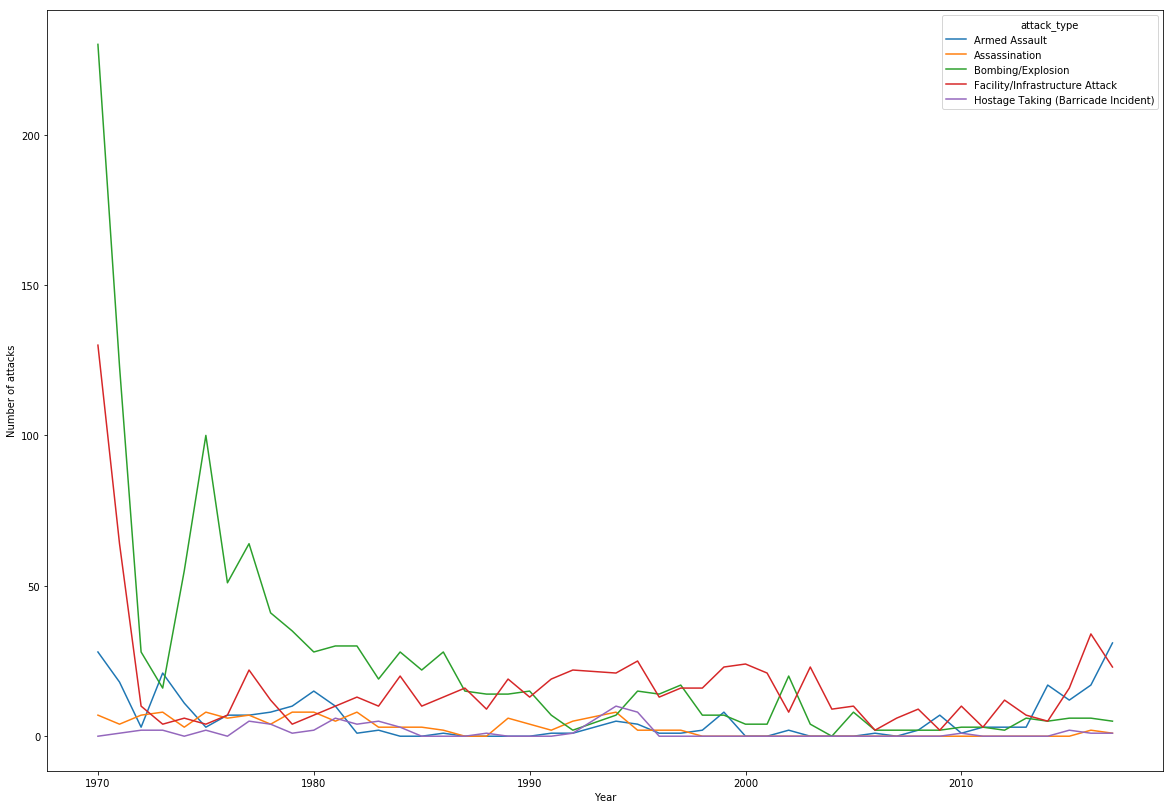

In [26]:
top_5_attack_types=df[df['attack_type'].isin(df['attack_type'].value_counts()[0:5].index)]
pd.crosstab(top_5_attack_types.year,top_5_attack_types.attack_type).plot()
fig=plt.gcf()
fig.set_size_inches(20,14)
#plt.box(on=None)
plt.ylabel('Number of attacks')
plt.xlabel('Year')
plt.show()

**Top 10 perpetrator groups**

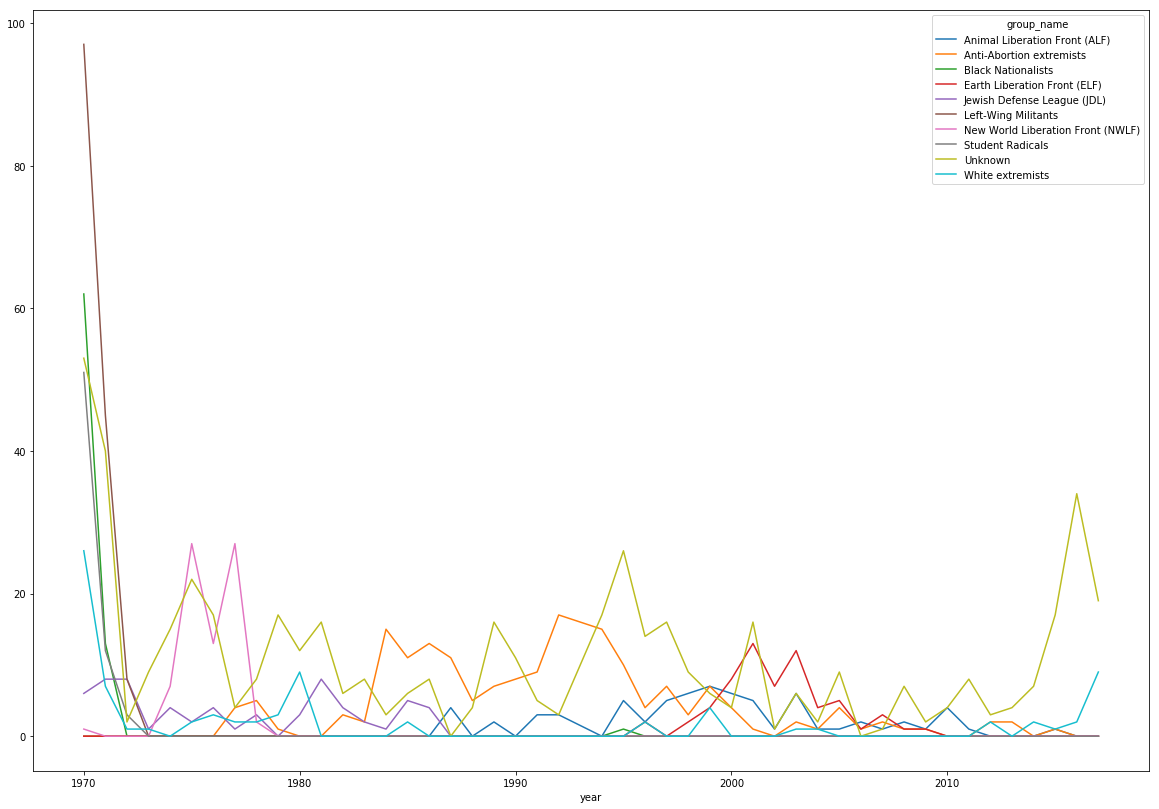

In [27]:
top_10_groups=df[df['group_name'].isin(df['group_name'].value_counts()[0:10].index)]
pd.crosstab(top_10_groups.year,top_10_groups.group_name).plot()
fig=plt.gcf()
fig.set_size_inches(20,14)
plt.show()

**Number of victims for armed assault and facility/infrastructure attacks over time**

In [28]:
df2 = df[df.attack_type.isin(['Armed Assault','Facility/Infrastructure Attack'])]

In [29]:
grouped_year_victims2 = pd.DataFrame(df2,columns = ['year','fatalities','wounded'])
grouped_year_victims2['victims'] = df2.fatalities + df2.wounded
grouped_year_victims2.drop(['fatalities', 'wounded'], axis=1, inplace=True)
grouped_year_victims2 = grouped_year_victims2.groupby(['year']).sum()
grouped_year_victims2

,victims
year,
1970,57
1971,50
1972,15
1973,53
1974,14
1975,4
1976,3
1977,5
1978,6


Text(0.5,0,'Year')

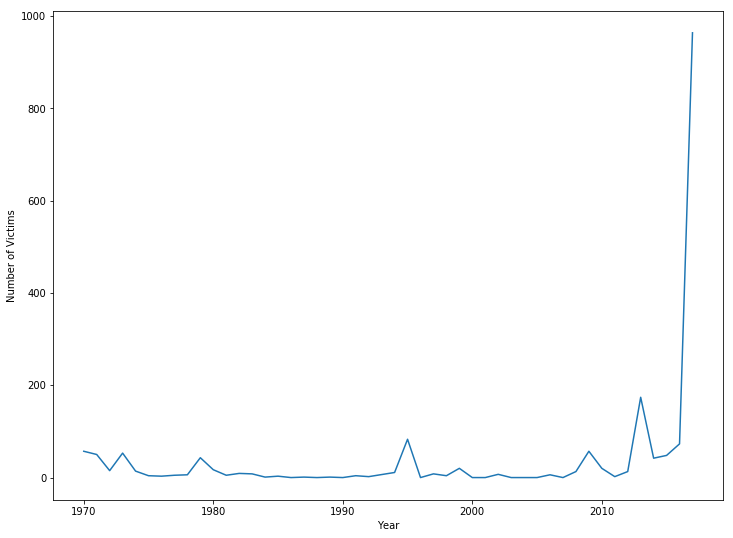

In [30]:
plt.figure(figsize=(12, 9))
plt.plot(grouped_year_victims2)
plt.ylabel('Number of Victims')
plt.xlabel('Year')

**Top 10 perpetrator groups for armed assault and facility attacks**

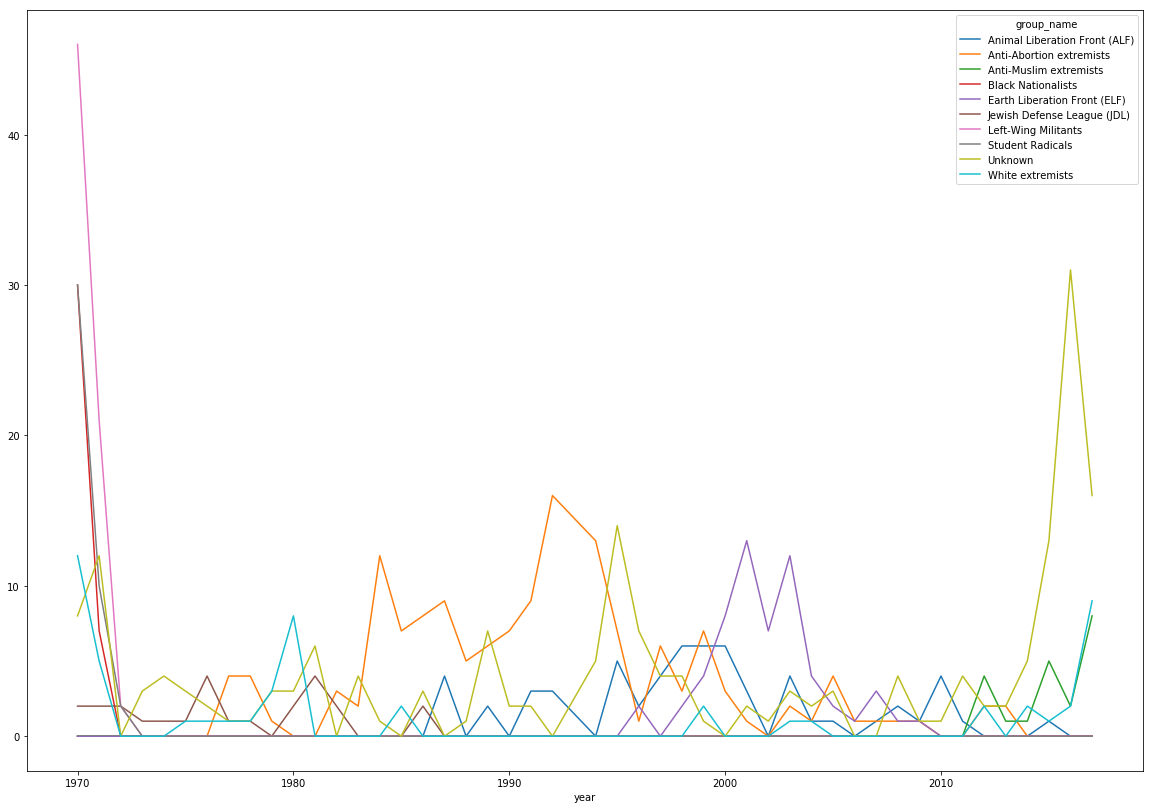

In [31]:
top_10_groups2=df2[df2['group_name'].isin(df2['group_name'].value_counts()[0:10].index)]
pd.crosstab(top_10_groups2.year,top_10_groups2.group_name).plot()
fig=plt.gcf()
fig.set_size_inches(20,14)
plt.show()

**Top target groups before and after 9/11**

In [32]:
df2_before = df2[df2.date < '2001-09-11']
df2_after = df2[df2.date > '2001-09-11']
df2_before['target'].value_counts(normalize=True)[0:10] * 100

Business                          22.265625
Abortion Related                  20.833333
Private Citizens & Property       11.067708
Government (General)               8.723958
Police                             7.421875
Military                           7.031250
Educational Institution            7.031250
Government (Diplomatic)            4.036458
Religious Figures/Institutions     3.515625
Journalists & Media                2.213542
Name: target, dtype: float64

In [33]:
df2_after['target'].value_counts(normalize=True)[0:10] * 100

Religious Figures/Institutions    24.199288
Private Citizens & Property       19.928826
Business                          18.861210
Abortion Related                   7.473310
Police                             7.473310
Government (General)               6.049822
Educational Institution            5.338078
Military                           3.914591
Utilities                          2.491103
Airports & Aircraft                1.423488
Name: target, dtype: float64

In [34]:
total_religious_attacks = df2_after.id[df2_after['target'] == 'Religious Figures/Institutions'].count()
total_attacks = df2_after.id.count()

In [35]:
religious_attacks_after = total_religious_attacks / total_attacks * 100
religious_attacks_after

24.199288256227756

In [36]:
total_religious_attacks_before = df2_before.id[df2_before['target'] == 'Religious Figures/Institutions'].count()
total_attacks_before = df2_before.id.count()

In [37]:
religious_attacks_before = total_religious_attacks_before / total_attacks_before * 100
religious_attacks_before

3.515625

In [38]:
religious_attacks_increase = (religious_attacks_after - religious_attacks_before) / religious_attacks_before *100
religious_attacks_increase

588.3353103993672

# Detailed analysis of attacks (armed assault, facility attacks) for religious motives

** Before 9/11 **

In [39]:
#used below to manually see which summaries have 'christian|church' as the victim
christian_before_list = df2_before.summary.str.contains('christian|church',case= False)
christian_before_list.sum()
df2_before[christian_before_list]
#[0,1,4,5,6,8,9,10,11,12,20,22,23] need to be removed from target list
#[1,6,8,10,11,12,22,23] are perpetrators associated with "church", specifically Christian Identity Church or World Church of the creator

christian_before_target = christian_before_list.sum()
christian_before_target -= 13
christian_before_target

christian_before_perp = 8
christian_before_perp

8

In [40]:
#used below to manually see which summaries have 'jewish|synagogue|jew' as the victim
judaism_before_list = df2_before.summary.str.contains('jewish|synagogue|jew',case= False)
judaism_before_list.sum()
#df2_before[judaism_before_list].iloc[23].summary
#[0,8,9,10,11,12,13,14,15,16,17,18,19,20,22] need to be removed from target list
#[8,9,10,11,12,13,14,15,16,17,18,19,20,22] are perpetrators associated with "jewish", many from Jewish Defense League

judaism_before_target = judaism_before_list.sum()
judaism_before_target -= 15
judaism_before_target

judaism_before_perp = 14
judaism_before_perp

14

In [41]:
#used below to manually see which summaries have 'muslim|islam|mosque|arab' as the victim
islam_before_list = df2_before.summary.str.contains('muslim|islam|mosque|arab',case= False)
islam_before_list.sum()
#df2_before[islam_before_list].iloc[19].summary
#[2:9,11:14,18] need to be removed from target list
#[2:9,11:14] are perpetrators associated with 'muslim|islam|mosque|arab'

islam_before_target = islam_before_list.sum()
islam_before_target -= 13
islam_before_target

islam_before_perp = 12
islam_before_perp

12

In [42]:
#used below to manually see which summaries have 'hare krishna|hindu|hindi|buddhist|buddhism' as the victim
hindu_before_list = df2_before.summary.str.contains('hare krishna|hindu|hindi|buddhist|buddhism',case= False)
hindu_before_list.sum()
#df2_before[hindu_before_list].iloc[1].summary
#none have to be removed

hindu_before_target = hindu_before_list.sum()
hindu_before_target

2

In [43]:
#the result is 0, so do not need to review summaries
sikh_before = df2_before.summary.str.contains('sikh',case= False).sum()

**Percentage Calculations of all Armed Assults and Facility Attacks Before 9/11:**

In [44]:
total_before = len(df2_before)

In [45]:
christian_before_target_percentage = christian_before_target / total_before * 100
christian_before_target_percentage

1.6927083333333333

In [46]:
christian_before_perp_percentage = christian_before_perp / total_before * 100
christian_before_perp_percentage

1.0416666666666665

In [47]:
judaism_before_target_percentage = judaism_before_target / total_before * 100
judaism_before_target_percentage

1.5625

In [48]:
judaism_before_perp_percentage = judaism_before_perp / total_before * 100
judaism_before_perp_percentage

1.8229166666666667

In [49]:
islam_before_target_percentage = islam_before_target / total_before * 100
islam_before_target_percentage

0.9114583333333334

In [50]:
islam_before_perp_percentage = islam_before_perp / total_before * 100
islam_before_perp_percentage

1.5625

In [51]:
hindu_before_target_percentage = hindu_before_target / total_before * 100
hindu_before_target_percentage

0.26041666666666663

**After 9/11**

In [52]:
#used below to manually see which summaries have 'christian|church' as the victim
christian_after_list = df2_after.summary.str.contains('christian|church',case= False)
christian_after_list.sum()
#df2_after[christian_after_list].iloc[34].summary
#[2,14] needs to be removed from target list
#none with words 'christian|church' related to perpetrators

christian_after_target = christian_after_list.sum()
christian_after_target -= 2
christian_after_target

33

In [53]:
#used below to manually see which summaries have 'jewish|synagogue|jew' as the victim
judaism_after_list = df2_after.summary.str.contains('jewish|synagogue|jew',case= False)
judaism_after_list.sum()
#none need to be removed from target list 
#none with words'jewish|synagogue|jew' related to perpetrators

judaism_after_target = judaism_after_list.sum()
judaism_after_target

7

In [54]:
#used below to manually see which summaries have 'muslim|islam|mosque|arab' as the victim
islam_after_list = df2_after.summary.str.contains('muslim|islam|mosque|arab|muhammad|mohammad',case= False)
islam_after_list.sum()
df2_after[islam_after_list].iloc[52].summary
#[0:2,4,5,7:19,12,21,23,25,33] need to be removed from target
#[0,2,4,5,8,9,10,12,13,16,17,19,21,25] are perpetrators associated with 'muslim|islam|mosque|arab'

islam_after_target = islam_after_list.sum()
islam_after_target -= 22
islam_after_target

islam_after_perp = 14
islam_after_perp

14

In [55]:
#used below to manually see which summaries have 'hare krishna|hindu|hindi|buddhist|buddhism' as the victim
hindu_after_list = df2_after.summary.str.contains('hare krishna|hindu|hindi|buddhist|buddhism',case= False)
hindu_after_list.sum()
#df2_after[hindu_after_list].iloc[0].summary
#all need to be kept for target list

hindu_after_target = hindu_after_list.sum()
hindu_after_target

1

In [56]:
#used below to manually see which summaries have 'sikh' as the victim
sikh_after_list = df2_after.summary.str.contains('sikh',case= False)
sikh_after_list.sum()
df2_after[sikh_after_list].iloc[1].summary
#all need to be kept for target list

sikh_after_target = sikh_after_list.sum()
sikh_after_target

2

**Percentage of Total Armed Assults and Facility Attacks After 9/11:**

In [57]:
total_after = len(df2_after)

In [58]:
christian_after_target_percentage = christian_after_target / total_after * 100
christian_after_target_percentage

11.743772241992882

In [59]:
judaism_after_target_percentage = judaism_after_target / total_after * 100
judaism_after_target_percentage

2.491103202846975

In [60]:
islam_after_target_percentage = islam_after_target / total_after * 100
islam_after_target_percentage

11.032028469750891

In [61]:
islam_after_perp_percentage = islam_after_perp / total_after * 100
islam_after_perp_percentage

4.98220640569395

In [62]:
sikh_after_target_percentage = sikh_after_target / total_after * 100
sikh_after_target_percentage

0.7117437722419928

**Percentage Changes:**

In [63]:
christian_target_percent_change = (christian_after_target_percentage - christian_before_target_percentage) / christian_before_target_percentage * 100
christian_target_percent_change

593.7859293731179

In [64]:
christian_perp_percent_change = (0 - christian_before_perp_percentage ) / christian_before_perp_percentage *100
christian_perp_percent_change
#we know there are still "christian" perpetrator groups, but they are no longer associated in name with christianity

-100.0

In [65]:
judaism_target_percent_change = (judaism_after_target_percentage - judaism_before_target_percentage) / judaism_before_target_percentage * 100
judaism_target_percent_change

59.430604982206404

In [66]:
judaism_perp_percent_change = (0 - judaism_before_perp_percentage)/judaism_before_perp_percentage * 100
judaism_perp_percent_change

-100.0

In [67]:
islam_target_percent_change = (islam_after_target_percentage - islam_before_target_percentage) / islam_before_target_percentage * 100
islam_target_percent_change

1110.3711235383835

In [68]:
islam_perp_percent_change = (islam_after_perp_percentage - islam_before_perp_percentage) / islam_before_perp_percentage * 100
islam_perp_percent_change

218.8612099644128

can't calculate percent Sikh increase because there were 0 records before 9/11

# Detailed analysis of attacks (armed assault, facility attacks) for racial motives

**Before 9/11**

In [69]:
white_before_list = df2_before.summary.str.contains('white|Ku Klux Klan|KKK|white american|neo-nazi|nazi|fascist',case= False)
white_before_list.sum()

#manually went through each summary to determine whether the perpetrator or the victim was associated with the race "white"
#df2_before[white_before_list].iloc[66].summary
white_before_target = white_before_list.sum()
white_before_target -= 42
white_before_target

white_before_perp = 42+1
white_before_perp

43

In [70]:
arabic_before_list = df2_before.summary.str.contains('arab|islamic|islamic state|iran|iraq|afghanistan|islamophobic|iraqi|arabic',case= False)
arabic_before_list.sum() #8
#[0,1,2,3,5,7] - target
#[] - perpetrator
#[4,6] - not related

#df2_before[arabic_before_list]

arabic_before_target = arabic_before_list.sum()
arabic_before_target -= 6
arabic_before_target

arabic_before_perp = 0
arabic_before_perp

0

In [71]:
nativeamerican_before_list = df2_before.summary.str.contains('native american|dakota',case= False)
nativeamerican_before_list.sum() #7
#[0,] - target
#[] - perpetrator
#[1,2,3,4,5,6] - not related

#df2_before[nativeamerican_before_list]

nativeamerican_before_target = nativeamerican_before_list.sum()
nativeamerican_before_target -= 1
nativeamerican_before_target

nativeamerican_before_perp = 0
nativeamerican_before_perp

0

In [72]:
asian_before_list = df2_before.summary.str.contains('asia|chinese|vietnam',case= False)
asian_before_list.sum()
#manually went through each summary to determine whether the perpetrator or the victim was associated with the race "white"
#some observations had both targets and perpetrators of the same race
#df2_before[asian_before_list]
asian_before_target = asian_before_list.sum()
asian_before_target

asian_before_perp = 2
asian_before_perp

2

In [73]:
black_before_list = df2_before.summary.str.contains('black|african american|african-american',case= False)
black_before_list.sum()
#df2_before[black_before_list].iloc[90].summary
#[0,1,3:5,8:20,23:32,45:50,52:54,57,65:71,77,78,86,87] need to be removed from the target list
#[0,1,3:5,10:19,23:32,45:50,52:54,57,65:71,77,78,86,87] are perpetrators associated with 'black|african american|african-american'

black_before_target = black_before_list.sum()
black_before_target -= 49
black_before_target

black_before_perp = 46
black_before_perp

46

In [74]:
latin_before_list = df2_before.summary.str.contains('latina|latino|latin|hispanic|mexican|mexico|cuba|puerto rico|puerto rican|venezuela',case= False)
latin_before_list.sum()
#df2_before[latin_before_list].iloc[26].summary
#[0:10,12,13,15:20,22:26] need to be removed from target list
#0,2:5,7, 8,10,12,16,18:20,22] are perpetrators associated with 'latina|latino|latin|hispanic|mexican|mexico|cuba|puerto rico|puerto rican'

latin_before_target = latin_before_list.sum()
latin_before_target -= 24
latin_before_target

latin_before_perp = 14
latin_before_perp

14

**Percentage Calculations of all Armed Assults and Facility Attacks Before 9/11:**

In [75]:
white_before_target_percentage = white_before_target / total_before * 100
white_before_target_percentage

3.125

In [76]:
white_before_perp_percentage = white_before_perp / total_before * 100
white_before_perp_percentage

5.598958333333334

In [77]:
arabic_before_target_percentage = arabic_before_target/total_before *100
arabic_before_target_percentage

0.26041666666666663

In [78]:
arabic_before_perp_percentage = arabic_before_perp/total_before *100
arabic_before_perp_percentage

0.0

In [79]:
nativeamerican_before_target_percentage = nativeamerican_before_target/total_before *100
nativeamerican_before_target_percentage

0.78125

In [80]:
nativeamerican_before_perp_percentage = nativeamerican_before_perp/total_before *100
nativeamerican_before_perp_percentage

0.0

In [81]:
asian_before_target_percentage = asian_before_target/total_before *100
asian_before_target_percentage

1.171875

In [82]:
asian_before_perp_percentage = asian_before_perp/total_before *100
asian_before_perp_percentage

0.26041666666666663

In [83]:
black_before_target_percentage = black_before_target / total_before *100
black_before_target_percentage

5.46875

In [84]:
black_before_perp_percentage = black_before_perp / total_before *100
black_before_perp_percentage

5.989583333333334

In [85]:
latin_before_target_percentage = latin_before_target / total_before * 100
latin_before_target_percentage

0.390625

In [86]:
latin_before_perp_percentage = latin_before_perp / total_before * 100
latin_before_perp_percentage

1.8229166666666667

**After 9/11**

In [87]:
white_after_list = df2_after.summary.str.contains('white|Ku Klux Klan|KKK|white american|neo-nazi|nazi|fascist',case= False)
white_after_list.sum()

#manually went through each summary to determine whether the perpetrator or the victim was associated with the race "white"
white_after_target = white_after_list.sum()
white_after_target -= 22
white_after_target

white_after_perp = 22+1
white_after_perp

23

In [88]:
arabic_after_list = df2_after.summary.str.contains('arab|islamic state|islamic|iran|iraq|afghanistan|islamophobic|iraqi|arabic',case= False)
arabic_after_list.sum() #32
#[2,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31] - target 19
#[0,3,4,5,6,7,8,9,10,11,16] - perpetrator 11
#[1,12] - not related

#df2_after[arabic_after_list]
arabic_after_target = arabic_after_list.sum()
arabic_after_target -= 19
arabic_after_target

arabic_after_perp = 11
arabic_after_perp

11

In [89]:
nativeamerican_after_list = df2_after.summary.str.contains('native american|dakota',case= False)
nativeamerican_after_list.sum() #7
#[1,2,3,4,5] - target 5
#[] - perpetrator 0
#[0,6] - not related 2
#df2_after[nativeamerican_after_list]
nativeamerican_after_target = nativeamerican_after_list.sum()
nativeamerican_after_target -= 5
nativeamerican_after_target

nativeamerican_after_perp = 0
nativeamerican_after_perp

0

In [90]:
asian_after_list = df2_after.summary.str.contains('asia|chinese|vietnam',case= False)
asian_after_list.sum()
#manually went through each summary to determine whether the perpetrator or the victim was associated with the race "white"
#some observations had both targets and perpetrators of the same race
#df2_after[asian_after_list].iloc[0].summary

asian_after_target = asian_after_list.sum()
asian_after_target

asian_after_perp = 0
asian_after_perp

0

In [91]:
black_after_list = df2_after.summary.str.contains('black|african american|african-american',case= False)
black_after_list.sum()
df2_after[black_after_list].iloc[19].summary
#[1,7:8,11:14,16,17] need to be removed from the target list
#[1, 11:14, 16] are perpetrators associated with 'black|african american|african-american'

black_after_target = black_after_list.sum()
black_after_target -= 9
black_after_target

black_after_perp = 6
black_after_perp

6

In [92]:
latin_after_list = df2_after.summary.str.contains('latina|latino|latin|hispanic|mexican|mexico|cuba|puerto rico|puerto rican|venezuela',case= False)
latin_after_list.sum()
df2_after[latin_after_list].iloc[9].summary
#[0:1,5:9] need to be removed from the target list
#[5] is a perpetrator associated with 'latina|latino|latin|hispanic|mexican|mexico|cuba|puerto rico|puerto rican|venezuela'

latin_after_target = latin_after_list.sum()
latin_after_target -= 7
latin_after_target

latin_after_perp = 1
latin_after_perp

1

**Percentage Calculations of all Armed Assults and Facility Attacks After 9/11:**

In [93]:
white_after_target_percentage = white_after_target / total_after * 100
white_after_target_percentage

4.98220640569395

In [94]:
white_after_perp_percentage = white_after_perp / total_after * 100
white_after_perp_percentage

8.185053380782918

In [95]:
arabic_after_target_percentage = arabic_after_target/total_after *100
arabic_after_target_percentage

4.6263345195729535

In [96]:
arabic_after_perp_percentage = arabic_after_perp/total_after *100
arabic_after_perp_percentage

3.9145907473309607

In [97]:
nativeamerican_after_target_percentage = nativeamerican_after_target/total_after *100
nativeamerican_after_target_percentage

0.7117437722419928

In [98]:
nativeamerican_after_perp_percentage = nativeamerican_after_perp/total_after *100
nativeamerican_after_perp_percentage

0.0

In [99]:
asian_after_target_percentage = asian_after_target/total_after *100
asian_after_target_percentage

0.3558718861209964

In [100]:
asian_after_perp_percentage = asian_after_perp/total_after *100
asian_after_perp_percentage

0.0

In [101]:
black_after_target_percentage = black_after_target / total_after * 100
black_after_target_percentage

3.9145907473309607

In [102]:
black_after_perp_percentage = black_after_perp / total_after * 100
black_after_perp_percentage

2.135231316725979

In [103]:
latin_after_target_percentage = latin_before_target / total_after * 100
latin_after_target_percentage

1.0676156583629894

In [104]:
latin_after_perp_percentage = latin_after_perp / total_after * 100
latin_after_perp_percentage

0.3558718861209964

**Percentage Changes Before and After 9/11**

In [105]:
white_target_percent_change = (white_after_target_percentage - white_before_target_percentage) / white_before_target_percentage * 100
white_target_percent_change

59.430604982206404

In [106]:
white_perp_percent_change = (white_after_perp_percentage - white_before_perp_percentage) / white_before_perp_percentage * 100
white_perp_percent_change

46.18886038235536

In [107]:
arabic_target_percent_change = (arabic_after_target_percentage-arabic_before_target_percentage)/arabic_before_target_percentage *100
arabic_target_percent_change

1676.5124555160141

can't calculate Arabic perpetrator increase because there were 0 records before 9/11

In [108]:
nativeamerican_target_percent_change = (nativeamerican_after_target_percentage-nativeamerican_before_target_percentage)/nativeamerican_before_target_percentage *100
nativeamerican_target_percent_change

-8.89679715302492

can't calculate Native American perpetrator increase because there were 0 records before 9/11

In [109]:
asian_target_percent_change = (asian_after_target_percentage-asian_before_target_percentage)/asian_before_target_percentage *100
asian_target_percent_change

-69.63226571767497

In [110]:
asian_perp_percent_change = (asian_after_perp_percentage-asian_before_perp_percentage)/asian_before_perp_percentage *100
asian_perp_percent_change

-100.0

In [111]:
black_target_percent_change = (black_after_target_percentage-black_before_target_percentage)/black_before_target_percentage *100
black_target_percent_change

-28.41891204880529

In [112]:
black_perp_percent_change = (black_after_perp_percentage-black_before_perp_percentage)/black_before_perp_percentage *100
black_perp_percent_change

-64.3509206250967

In [113]:
latin_target_percent_change = (latin_after_target_percentage-latin_before_target_percentage)/latin_before_target_percentage *100
latin_target_percent_change

173.3096085409253

In [114]:
latin_perp_percent_change = (latin_after_perp_percentage-latin_before_perp_percentage)/latin_before_perp_percentage *100
latin_perp_percent_change

-80.47788510421962

**Team Members:** Kristina Liapchin, Nalorm Tay, Sarah Bortnem